In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.lines import Line2D
plt.style.use("../paper.mplstyle")

from scipy.integrate import quad
from scipy.interpolate import splev, splrep

In [51]:
ch = 8
m  = 1000
emin = 10
ee   = np.linspace(emin, m, 200)

brw_flux = np.load('/data/user/jlazar/solar_WIMP/data/qr_dn_dz/ch%d-m%d_dn_dz_test.npy' % (ch, m))
pyt_flux = np.load('../data/qr_dn_dz/ch%d-m%d_dn_dz_pythia.npy' % (ch, m))

In [52]:
brw_nuflux0    = brw_flux[0,0,:]
brw_nubarflux0 = brw_flux[1,0,:]
brw_nuflux1    = brw_flux[0,-1,:]
brw_nubarflux1 = brw_flux[1,-1,:]

pyt_nuflux0    = pyt_flux[0,0,:]
pyt_nubarflux0 = pyt_flux[1,0,:]
pyt_nuflux1    = pyt_flux[0,-1,:]
pyt_nubarflux1 = pyt_flux[1,-1,:]

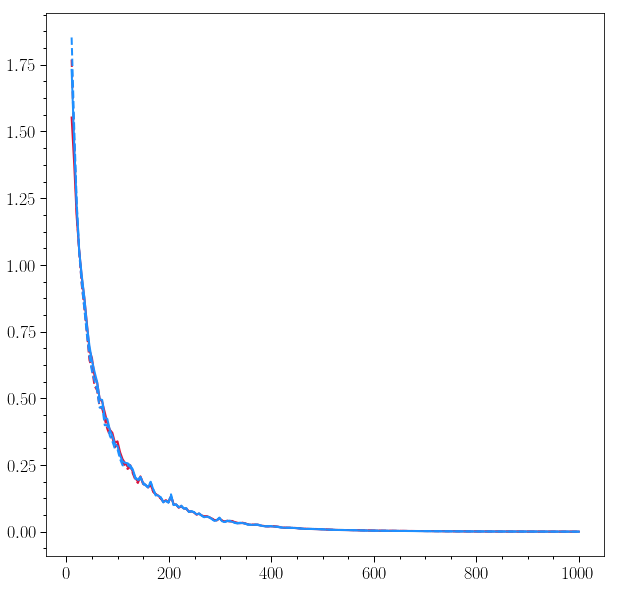

In [54]:
plt.plot(ee, brw_nuflux0, color='crimson')
plt.plot(ee, pyt_nuflux0, color='crimson', ls='--')
plt.plot(ee, brw_nuflux1, color='dodgerblue')
plt.plot(ee, pyt_nuflux1, color='dodgerblue', ls='--')
# plt.semilogy()
plt.show()

In [55]:
ewidths = ee[1:]-ee[:-1]
def integrate(ch, m):
    emin = 10
    ll = float(emin)/m
    zz   = np.linspace(ll, 1, 200)
    
    brw_nuflux = np.load('../data/qr_dn_dz/ch%d-m%d_dn_dz_test.npy' % (ch, m))[0,0,:]
    pyt_nuflux = np.load('../data/qr_dn_dz/ch%d-m%d_dn_dz_pythia.npy' % (ch, m))[0,0,:]
    brw_isfinite = np.where(np.isfinite(np.log(brw_nuflux)))[0]
    pyt_isfinite = np.where(np.isfinite(np.log(pyt_nuflux)))[0]
    pyt_tck    = splrep(zz[pyt_isfinite], np.log(pyt_nuflux)[pyt_isfinite])
    brw_tck    = splrep(zz[brw_isfinite], np.log(brw_nuflux)[brw_isfinite])
    
    def get_flux(z, tck):
        return np.exp(splev(z, tck))
    print(get_flux(0.4, brw_tck))
    _ = lambda x: get_flux(x, brw_tck)
    brw_I = quad(_, ll, zz[brw_isfinite][-1])
    _ = lambda x: get_flux(x, pyt_tck)
    pyt_I = quad(_, ll, zz[pyt_isfinite][-1])
    print(brw_I)
    print(pyt_I)

In [ ]:
integrate(8,1000)